# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

ModuleNotFoundError: No module named 'alpaca_trade_api'

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
btc_amount = 1.2
eth_amount = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
btc_response_data = requests.get(btc_url).json()
print(json.dumps(btc_response_data, indent=4))

# Fetch current ETH price
eth_response_data = requests.get(eth_url).json()
print(json.dumps(eth_response_data, indent=4))

# Compute current value of my crpto
btc_price = btc_response_data['data']['1']['quotes']['USD']['price']
btc_value = btc_amount * btc_price

eth_price = eth_response_data['data']['1027']['quotes']['USD']['price']
eth_value = eth_amount * eth_price

# Print current crypto wallet balance
print(f"The current value of your {btc_amount} BTC is ${btc_value:0.2f}")
print(f"The current value of your {eth_amount} ETH is ${eth_value:0.2f}")

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 18741143,
            "total_supply": 18741143,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 33934.0,
                    "volume_24h": 60337557466,
                    "market_cap": 636584615009,
                    "percentage_change_1h": -1.06484300240482,
                    "percentage_change_24h": 7.80820269120387,
                    "percentage_change_7d": -15.9586660919359,
                    "percent_change_1h": -1.06484300240482,
                    "percent_change_24h": 7.80820269120387,
                    "percent_change_7d": -15.9586660919359
                },
                "CAD": {
                    "price": 41667.5586,
                    "volume_24h": 74088486812.5014,
                    "

### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Current amount of shares
agg_shares = 200
spy_shares = 50

In [7]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

NameError: name 'tradeapi' is not defined

In [8]:
# Format current date as ISO format
current_date = pd.Timestamp("2021-6-17", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
prices = api.get_barset(
    tickers, 
    timeframe, 
    start=current_date, 
    end=current_date
).df

# Preview DataFrame
prices.head()

NameError: name 'api' is not defined

In [38]:
# Pick AGG and SPY close prices
agg_price = float(prices["AGG"]["close"])
spy_price = float(prices["SPY"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_price}")
print(f"Current SPY closing price: ${spy_price}")

Current AGG closing price: $114.99
Current SPY closing price: $421.97


In [39]:
# Compute the current value of shares
agg_value = agg_shares * agg_price 
spy_value = spy_shares * spy_price 

# Print the current value of the stocks portfolio
print(f"The current value of your {agg_shares} AGG shares is ${agg_value:0.2f}")
print(f"The current value of your {spy_shares} SPY shares is ${spy_value:0.2f}")

The current value of your 200 AGG shares is $22998.00
The current value of your 50 SPY shares is $21098.50


### Savings Health Analysis

In [40]:
# Set monthly household income
monthly_income = 12000

# Set total investments value
total_crypto = round(btc_value + eth_value, 2)
total_stocks = round(agg_value + spy_value, 2)
investment_data = {'value': [total_crypto, total_stocks]}

# Create savings DataFrame
savings_df = pd.DataFrame(investment_data, index = ['crypto', 'shares'])

# Display savings DataFrame
display(savings_df)

value
crypto  48395.8
shares  44096.5

<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='value'>

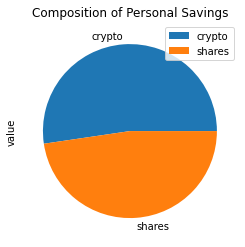

In [41]:
# Plot savings pie chart
savings_df.plot.pie(y='value', title='Composition of Personal Savings')

In [42]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = total_crypto + total_stocks
emergency_fund_difference = emergency_fund - total_savings

# Validate saving health
if emergency_fund < total_savings:
    print("Congratalions! You have enough money in your emergency fund.")
elif emergency_fund == total_savings:
    print("Congratulations! You have reached this financial goal")
else:
    print(f"You are ${emergency_fund_difference} away from reaching the goal")

Congratalions! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [43]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-06-17', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-06-17', tz='America/New_York').isoformat()

In [44]:
# Get 5 years' worth of historical data for SPY and AGG
stock_data_df= api.get_barset(
    tickers,
    timeframe,
    start= start_date,
    end= end_date    
).df

# Display sample data
stock_data_df.head()

AGG                                      \
                               open     high       low   close   volume   
time                                                                      
2021-01-26 00:00:00-05:00  117.4600  117.585  117.4255  117.51  3451493   
2021-01-27 00:00:00-05:00  117.6100  117.670  117.0400  117.52  3509666   
2021-01-28 00:00:00-05:00  117.4800  117.490  117.2900  117.43  4440895   
2021-01-29 00:00:00-05:00  117.1563  117.400  116.5625  117.32  7119889   
2021-02-01 00:00:00-05:00  117.2000  117.260  117.0915  117.21  5469814   

                              SPY                                      
                             open    high      low   close     volume  
time                                                                   
2021-01-26 00:00:00-05:00  385.41  385.85  383.540  383.83   36871235  
2021-01-27 00:00:00-05:00  380.22  380.32  372.010  374.44   99246554  
2021-01-28 00:00:00-05:00  376.36  381.93  375.890  377.60   75229306  
2021-01-29 00:00:00-05:00  375.63  376.67  368.270  370.19  106397082  
2021-02-01 00:00:00-05:00  373.72  377.34  370.376  376.18   64056510

In [45]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_stocks= MCSimulation(portfolio_data= stock_data_df, weights = [.40, .60], num_simulation= 500, num_trading_days = 252*30)

In [46]:
# Printing the simulation input data
MC_stocks.portfolio_data.head()

AGG                                      \
                               open     high       low   close   volume   
time                                                                      
2021-01-26 00:00:00-05:00  117.4600  117.585  117.4255  117.51  3451493   
2021-01-27 00:00:00-05:00  117.6100  117.670  117.0400  117.52  3509666   
2021-01-28 00:00:00-05:00  117.4800  117.490  117.2900  117.43  4440895   
2021-01-29 00:00:00-05:00  117.1563  117.400  116.5625  117.32  7119889   
2021-02-01 00:00:00-05:00  117.2000  117.260  117.0915  117.21  5469814   

                                           SPY                           \
                          daily_return    open    high      low   close   
time                                                                      
2021-01-26 00:00:00-05:00          NaN  385.41  385.85  383.540  383.83   
2021-01-27 00:00:00-05:00     0.000085  380.22  380.32  372.010  374.44   
2021-01-28 00:00:00-05:00    -0.000766  376.36  381.93  375.890  377.60   
2021-01-29 00:00:00-05:00    -0.000937  375.63  376.67  368.270  370.19   
2021-02-01 00:00:00-05:00    -0.000938  373.72  377.34  370.376  376.18   

                                                   
                              volume daily_return  
time                                               
2021-01-26 00:00:00-05:00   36871235          NaN  
2021-01-27 00:00:00-05:00   99246554    -0.024464  
2021-01-28 00:00:00-05:00   75229306     0.008439  
2021-01-29 00:00:00-05:00  106397082    -0.019624  
2021-02-01 00:00:00-05:00   64056510     0.016181

In [47]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_stocks.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0          1          2          3          4          5    \
0      1.000000   1.000000   1.000000   1.000000   1.000000   1.000000   
1      1.005698   0.994863   0.999035   0.995710   0.993236   0.997290   
2      1.012434   1.000174   0.998189   1.007190   0.999248   1.000932   
3      1.021187   0.999306   1.004475   1.002677   0.996875   1.006975   
4      1.018562   0.998030   1.013408   1.000883   1.001177   1.007107   
...         ...        ...        ...        ...        ...        ...   
7556  52.583277  35.925941  44.567310  50.126804  49.136985  60.178003   
7557  52.511648  36.379490  44.752628  50.416888  49.997793  60.264017   
7558  52.741341  36.307341  44.536164  50.012904  50.060137  60.046494   
7559  52.769029  36.049406  44.552373  50.168438  50.451389  60.613301   
7560  52.777845  36.158335  45.008571  50.184849  50.801750  60.497241   

            6          7          8          9    ...        490        491  \
0      1.000000   1.000000   1.000000   1.000000  ...   1.000000   1.000000   
1      0.993408   1.006925   1.002975   0.989101  ...   1.012654   1.002688   
2      1.000752   1.010017   1.001719   0.990627  ...   1.016001   0.998087   
3      1.012273   1.014662   0.993414   0.991401  ...   1.013165   0.996711   
4      1.007445   1.004648   0.984726   0.989512  ...   1.023275   0.991654   
...         ...        ...        ...        ...  ...        ...        ...   
7556  47.466670  36.191408  23.434811  31.161047  ...  41.778662  37.017534   
7557  47.712689  36.389708  23.366507  31.040708  ...  41.413606  37.159300   
7558  47.890546  36.265414  23.457314  30.860569  ...  41.441829  36.990085   
7559  47.651649  36.791236  23.443707  30.901112  ...  41.583905  37.301961   
7560  47.782262  36.793114  23.616001  30.792977  ...  41.916863  37.226027   

            492        493        494        495        496        497  \
0      1.000000   1.000000   1.000000   1.000000   1.000000   1.000000   
1      1.003649   0.995767   0.993472   1.003072   1.005269   0.997904   
2      1.008151   0.993779   0.992660   1.002391   1.006300   0.999915   
3      1.010902   0.998326   0.994375   1.006206   1.011503   1.000404   
4      1.017222   0.994695   1.000804   1.008938   1.013308   1.004649   
...         ...        ...        ...        ...        ...        ...   
7556  46.364976  78.953575  32.369463  56.574802  34.216606  80.347059   
7557  46.111254  78.642025  32.410590  56.688558  34.155171  80.215703   
7558  45.759393  78.716673  32.377456  56.160179  34.607513  80.391727   
7559  45.599691  78.074144  32.311610  55.389190  34.657980  79.832634   
7560  45.835371  78.200569  32.278013  55.539852  34.704406  79.429311   

            498         499  
0      1.000000    1.000000  
1      1.005206    0.996710  
2      1.003598    1.006182  
3      1.009032    1.012682  
4      1.004666    1.009480  
...         ...         ...  
7556  21.470468   98.424233  
7557  21.293635   99.617470  
7558  21.472715  100.214530  
7559  21.298411  100.691407  
7560  21.202701  101.797335  

[7561 rows x 500 columns]

<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

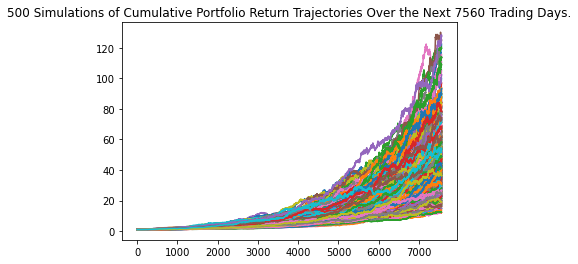

In [19]:
# Plot simulation outcomes
MC_stocks.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

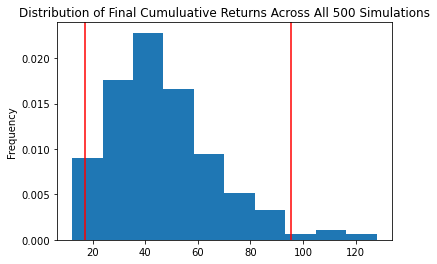

In [24]:
# Plot probability distribution and confidence intervals
MC_stocks.plot_distribution()

### Retirement Analysis

In [25]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_statistics= MC_stocks.summarize_cumulative_return()

# Print summary statistics
print(summary_statistics)

count           500.000000
mean             46.855548
std              20.684165
min              12.199538
25%              32.150397
50%              43.906238
75%              57.990781
max             127.993903
95% CI Lower     17.004865
95% CI Upper     95.407295
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [27]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower= round(summary_statistics[8]*20000, 2)
ci_upper= round(summary_statistics[9]*20000, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}.")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $340097.29 and $1908145.89.


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [29]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower= round(summary_statistics[8]*30000, 2)
ci_upper= round(summary_statistics[9]*30000, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}.")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $510145.94 and $2862218.84.
